In [1]:
import numpy
import boxkit
import matplotlib.pyplot as pyplot

In [2]:
dataset_blocks=boxkit.read.Dataset("/Users/Akash/Desktop/Akash/Workbench/Performance/simulation/Bittree/DeformingBubble2D/parameshBittree/jobnode.archive/sedona-AMRranks8/INS_Deforming_Bubble_hdf5_plt_cnt_0050", source="flash")

In [3]:
def plot_velx(dataset):
    pyplot.figure()
    pyplot.rc("font", family="serif", size=14, weight="bold")
    pyplot.rc("axes", labelweight="bold", titleweight="bold")
    pyplot.rc("text", usetex=True)
    for block in dataset.blocklist:
        xmesh, ymesh = numpy.meshgrid(numpy.linspace(block.xmin + block.dx/2, block.xmax - block.dx/2, block.nxb), numpy.linspace(block.ymin - block.dy/2, block.ymax + block.dy/2, block.nyb))
        pyplot.contourf(xmesh, ymesh, block["velx"][0,:,:])
    pyplot.axis('equal')
    pyplot.tight_layout()
    pyplot.xlim([dataset.xmin, dataset.xmax])
    pyplot.ylim([dataset.ymin, dataset.ymax])
    pyplot.show()

In [4]:
print(dataset_blocks)

Dataset:
 - type         : <class 'boxkit.library._dataset.Dataset'>
 - file         : <HDF5 file "INS_Deforming_Bubble_hdf5_plt_cnt_0050" (mode r)>
 - keys         : ['dust', 'velx', 'vely', 'dfun']
 - dtype	: [<class 'h5pickle.Dataset'>, <class 'h5pickle.Dataset'>, <class 'h5pickle.Dataset'>, <class 'h5pickle.Dataset'>]
 - bound(z-y-x) : [0.0, 1.0] x [0.0, 1.0] x [0.0, 1.0]
 - shape(z-y-x) : 1 x 16 x 16
 - guard(z-y-x) : 0 x 0 x 0
 - nblocks      : 536
 - dtype        : {'dust': <class 'h5pickle.Dataset'>, 'velx': <class 'h5pickle.Dataset'>, 'vely': <class 'h5pickle.Dataset'>, 'dfun': <class 'h5pickle.Dataset'>}


In [5]:
reshaped_dataset=boxkit.reshape.Mergeblocks(dataset_blocks, "velx", level=1, nthreads=1, backend="loky")

[boxkit.stencils.map_dataset_block]: 0.001s
[boxkit.reshape.mergeblocks]: 0.009s


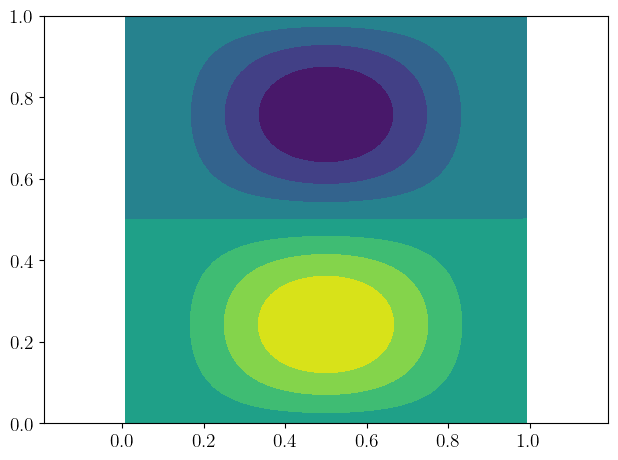

In [6]:
plot_velx(reshaped_dataset)